## Second step

In [ ]:
opt_bids = [5.92895410817995,  2.682396521822428,  2.9540452274843294]
opt_price = 6.541655879916771

### UCB like learner

In [24]:
import numpy as np
from matplotlib import pyplot as plt 
from learners import UCB1_Learner
from environment import Environment

UCB1 = UCB1_Learner()

T = 365
env = Environment()
regret = []

for day in range(T):
    bids, price = UCB1.pull_arm()
    reward = env.round(bids, price)
    UCB1.update(bids, price, reward)
    regret.append(sum(env.round(opt_bids, opt_price)) - sum(reward))


In [ ]:
import matplotlib.pyplot as plt 
X = np.arange(0,365)
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(X, regret , 'r')

plt.show()

In [ ]:
UCB1.pull_arm()

### Gaussian process optimizer

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from learners import GP_Learner
from environment import Environment
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

opt_bids = [5.92895410817995,  2.682396521822428,  2.9540452274843294]
opt_price = 6.541655879916771

bids = np.array([1.0, 1.0, 1.0])
price = 4.5      #Initial Price
T = 365

env = Environment()
gp_learner = GP_Learner()
regrets = [] 
sols = []

for t in tqdm(range(T)):
    outcome = sum(env.round(bids, price))
    gp_learner.fit(bids, price, outcome)

    bids, price = gp_learner.optimize()
    
    sols.append((bids ,price))
    regrets.append(sum(env.round(opt_bids, opt_price)) - outcome)

100%|██████████| 365/365 [05:58<00:00,  1.02it/s]


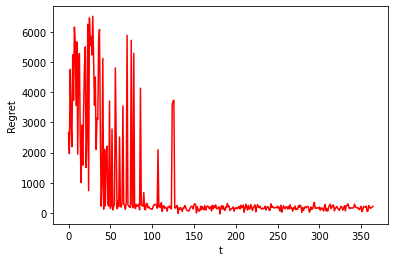

In [2]:
import matplotlib.pyplot as plt 
X = np.arange(0,365)
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(X, regrets , 'r')

plt.show()

In [19]:
sols[-10:]

sum(env.round([6,5,3],6))
#sum(env.round(opt_bids, opt_price))

5294.746588979637

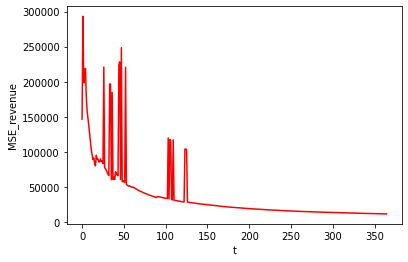

In [20]:
import matplotlib.pyplot as plt 
X = np.arange(0,365)
plt.figure(0)
plt.xlabel("t")
plt.ylabel("MSE_revenue")
plt.plot(X, gp_learner.error , 'r')

plt.show()